In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

from sklearn import metrics

import contractions

import scikitplot as skplt
import matplotlib.pyplot as plt

In [2]:
yelp_data_5k = pd.read_csv(r"C:\Users\sebas\Documents\School\bachelor-final\Dataset\PROCESSED_RESTAURANT_REVIEWS_5k.csv")

In [3]:
yelp_data_5k.head()

,Unnamed: 0,reviewContent,usefulCount,coolCount,funnyCount,rating,restaurantID,reviewCleanWithStopwords,reviewCleanNoStopwords,reviewCleanPorterStemmer,reviewCleanSnowballStemmer,reviewCleanLemmatized,reviewCleanLancaster
0,0,"""'Check, Please."" The bartender was unable to ...",18,11,25,1,VZHyAmdFDreQqL0BT-zdoA,check please the bartender was unable to recom...,check please bartender unable recommend beer t...,check pleas bartend unabl recommend beer tap t...,check pleas bartend unabl recommend beer tap t...,check please bartender unable recommend beer t...,check pleas bartend un recommend beer tap tri ...
1,1,"""2 stars for disappointing food, one star for ...",14,10,7,3,tFcmrGLZNEymSnijoTPmqw,stars for disappointing food one star for grea...,stars disappointing food one star great servic...,star disappoint food one star great servic rea...,star disappoint food one star great servic rea...,star disappoint food one star great service re...,star disappoint food on star gre serv read iai...
2,2,"""A Divine Dialogue"" God: ""Britton. Times up. T...",14,16,23,5,INvIaBFnAvGxzTXFWHzGvA,divine dialogue god britton times up the world...,divine dialogue god britton times world going ...,divin dialogu god britton time world go end to...,divin dialogu god britton time world go end to...,divine dialogue god britton time world go end ...,divin dialog god britton tim world going end t...
3,3,"""A Place To Go When You Have Time"" It was a mi...",13,10,10,5,FySId5SjNhkrtPA5qktdxg,place to go when you have time it was misty br...,place go time misty breezy summer night friend...,place go time misti breezi summer night friend...,place go time misti breezi summer night friend...,place go time misty breezy summer night friend...,plac go tim misty breezy sum night friend jere...
4,4,"""A Thaiphoon of Flavor"" My First: I never enli...",27,22,28,5,RgeMUiZncTs-VSHQLm0wNg,thaiphoon of flavor my first never enlisted in...,thaiphoon flavor first never enlisted air forc...,thaiphoon flavor first never enlist air forc a...,thaiphoon flavor first never enlist air forc a...,thaiphoon flavor first never enlist air force ...,thaiphoon flav first nev enl air forc allow jo...


In [4]:
yelp_data_5k.rating.value_counts()

2    1250
5    1179
1    1159
3    1130
4    1051
Name: rating, dtype: int64

In [5]:
yelp_data_5k.isnull().values.any()

False

# Remove data from table with rating = 2 or 4

In [6]:
# Get names of indexes for which column rating has value 2
indexNamesRating2 = yelp_data_5k[ yelp_data_5k['rating'] == 2 ].index
 
# Delete these row indexes from dataFrame
yelp_data_5k.drop(indexNamesRating2, inplace=True)

# Get names of indexes for which column rating has value 4
indexNamesRating4 = yelp_data_5k[ yelp_data_5k['rating'] == 4 ].index
 
# Delete these row indexes from dataFrame
yelp_data_5k.drop(indexNamesRating4, inplace=True)

In [7]:
yelp_data_5k.rating.value_counts()

5    1179
1    1159
3    1130
Name: rating, dtype: int64

# Allocating each text with its specific cleaning method to a variable

In [8]:
x_cleanWithStopwords = yelp_data_5k["reviewCleanWithStopwords"]
x_cleanNoStopwords = yelp_data_5k["reviewCleanNoStopwords"]
x_porterStemmer = yelp_data_5k["reviewCleanPorterStemmer"]
x_snowballStemmer = yelp_data_5k["reviewCleanSnowballStemmer"]
x_lemmatized = yelp_data_5k["reviewCleanLemmatized"]
x_lancaster = yelp_data_5k["reviewCleanLancaster"]

# Vectorisation

In [9]:
tf = TfidfVectorizer(ngram_range=(1,2), min_df=5).fit(x_cleanWithStopwords)
x_cleanWithStopwords = tf.transform(x_cleanWithStopwords)

tf = TfidfVectorizer(ngram_range=(1,2), min_df=5).fit(x_cleanNoStopwords)
x_cleanNoStopwords = tf.transform(x_cleanNoStopwords)

tf = TfidfVectorizer(ngram_range=(1,2), min_df=5).fit(x_porterStemmer)
x_porterStemmer = tf.transform(x_porterStemmer)

tf = TfidfVectorizer(ngram_range=(1,2), min_df=5).fit(x_snowballStemmer)
x_snowballStemmer = tf.transform(x_snowballStemmer)

tf = TfidfVectorizer(ngram_range=(1,2), min_df=5).fit(x_lemmatized)
x_lemmatized = tf.transform(x_lemmatized)

tf = TfidfVectorizer(ngram_range=(1,2), min_df=5).fit(x_lancaster)
x_lancaster = tf.transform(x_lancaster)

In [10]:
y = yelp_data_5k["rating"]

# Splitting the data for training and testing

In [11]:
x_train_cleanWithStopwords, x_test_cleanWithStopwords, y_train, y_test = train_test_split(x_cleanWithStopwords, y, test_size=0.2, random_state=50)

x_train_cleanNoStopwords, x_test_cleanNoStopwords, y_train, y_test = train_test_split(x_cleanNoStopwords, y, test_size=0.2, random_state=50)

x_train_porterStemmer, x_test_porterStemmer, y_train, y_test = train_test_split(x_porterStemmer, y, test_size=0.2, random_state=50)

x_train_snowballStemmer, x_test_snowballStemmer, y_train, y_test = train_test_split(x_snowballStemmer, y, test_size=0.2, random_state=50)

x_train_lemmatized, x_test_lemmatized, y_train, y_test = train_test_split(x_lemmatized, y, test_size=0.2, random_state=50)

x_train_lancaster, x_test_lancaster, y_train, y_test = train_test_split(x_lancaster, y, test_size=0.2, random_state=50)

# Models
## Multinomial Naive Bayes

WITH STOPWORDS
Confusion Matrix for Multinomial Naive Bayes:
[[203  34  11]
 [ 32 135  52]
 [ 10  19 198]]
Score: 77.23
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.82      0.82       248
           3       0.72      0.62      0.66       219
           5       0.76      0.87      0.81       227

   micro avg       0.77      0.77      0.77       694
   macro avg       0.77      0.77      0.77       694
weighted avg       0.77      0.77      0.77       694

WITHOUT STOPWORDS
Confusion Matrix for Multinomial Naive Bayes:
[[203  37   8]
 [ 34 136  49]
 [ 10  27 190]]
Score: 76.22
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.82      0.82       248
           3       0.68      0.62      0.65       219
           5       0.77      0.84      0.80       227

   micro avg       0.76      0.76      0.76       694
   macro avg       0.76      0.76      0.76       694
we

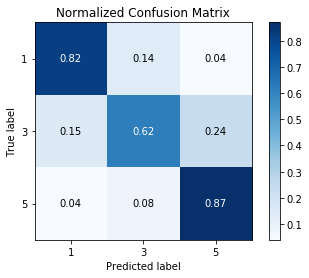

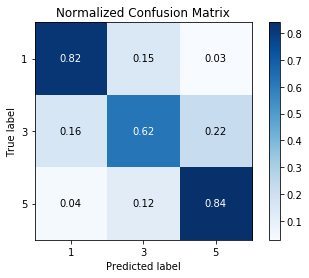

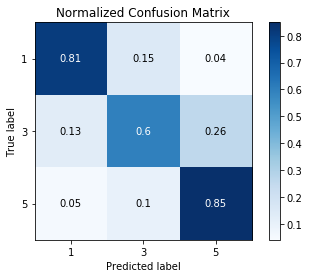

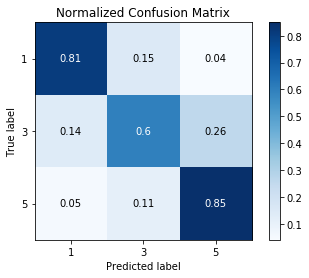

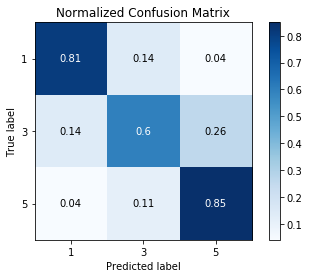

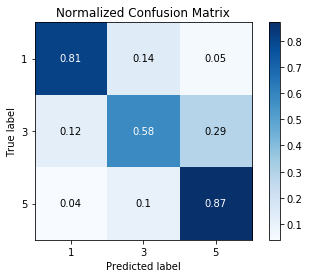

In [12]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# WITH STOPWORDS #################################################################################################################

# initialization
mnb = MultinomialNB()
mnb.fit(x_train_cleanWithStopwords, y_train)

# predicting
prediction = mnb.predict(x_test_cleanWithStopwords)

# generating and printing confusion matrix
print("WITH STOPWORDS")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_mnb_with_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# WITHOUT STOPWORDS #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_cleanNoStopwords, y_train)

# predicting
prediction = mnb.predict(x_test_cleanNoStopwords)

# generating and printing confusion matrix
print("WITHOUT STOPWORDS")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_mnb_no_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_porterStemmer, y_train)

# predicting
prediction = mnb.predict(x_test_porterStemmer)

# generating and printing confusion matrix
print("PORTERSTEMMER")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_mnb_porterstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_snowballStemmer, y_train)

# predicting
prediction = mnb.predict(x_test_snowballStemmer)

# generating and printing confusion matrix
print("SNOWBALLSTEMMER")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_mnb_snowballstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_lemmatized, y_train)

# predicting
prediction = mnb.predict(x_test_lemmatized)

# generating and printing confusion matrix
print("LEMMATIZED")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_mnb_lemmatized_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LANCASTER #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_lancaster, y_train)

# predicting
prediction = mnb.predict(x_test_lancaster)

# generating and printing confusion matrix
print("LANCASTER")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_mnb_lancaster_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

## Random Forrest

CLEANED WITH STOPWORDS
Confusion Matrix for Random Forest Classifier:
[[222  16  10]
 [ 43 137  39]
 [ 26  29 172]]
Score: 76.51
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.90      0.82       248
           3       0.75      0.63      0.68       219
           5       0.78      0.76      0.77       227

   micro avg       0.77      0.77      0.77       694
   macro avg       0.76      0.76      0.76       694
weighted avg       0.76      0.77      0.76       694

WITHOUT STOPWORDS
Confusion Matrix for Random Forest Classifier:
[[220  17  11]
 [ 46 128  45]
 [ 26  30 171]]
Score: 74.78
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.89      0.81       248
           3       0.73      0.58      0.65       219
           5       0.75      0.75      0.75       227

   micro avg       0.75      0.75      0.75       694
   macro avg       0.75      0.74      0.74   

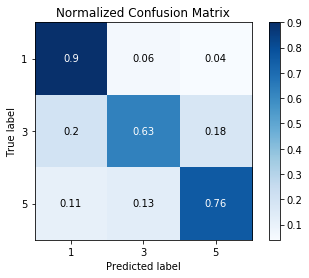

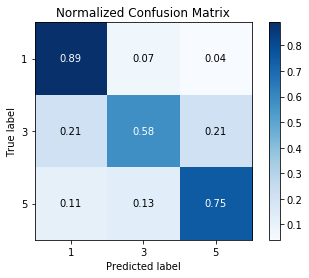

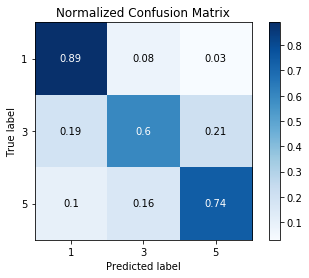

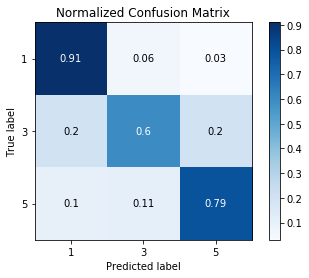

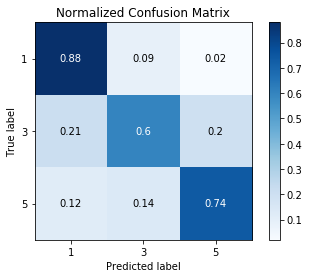

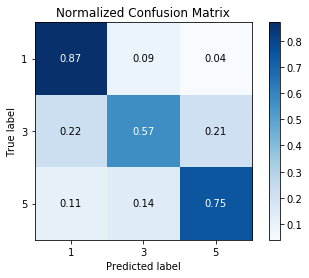

In [13]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# WITH STOPWORDS #################################################################################################################

# initialization
rmf = RandomForestClassifier(n_estimators=200)
rmf.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = rmf.predict(x_test_cleanWithStopwords)

# generating and printing confusion matrix
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Random Forest Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_rmf_with_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# WITHOUT STOPWORDS #################################################################################################################


# initialization
rmf = RandomForestClassifier(n_estimators=200)
rmf.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = rmf.predict(x_test_cleanNoStopwords)

# generating and printing confusion matrix
print("WITHOUT STOPWORDS")
print("Confusion Matrix for Random Forest Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_rmf_no_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################


# initialization
rmf = RandomForestClassifier(n_estimators=200)
rmf.fit(x_train_porterStemmer,y_train)

# predicting
prediction = rmf.predict(x_test_porterStemmer)

# generating and printing confusion matrix
print("PORTERSTEMMER")
print("Confusion Matrix for Random Forest Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_rmf_porterstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################


# initialization
rmf = RandomForestClassifier(n_estimators=200)
rmf.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = rmf.predict(x_test_snowballStemmer)

# generating and printing confusion matrix
print("SNOWBALLSTEMMER")
print("Confusion Matrix for Random Forest Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_rmf_snowballstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################


# initialization
rmf = RandomForestClassifier(n_estimators=200)
rmf.fit(x_train_lemmatized,y_train)

# predicting
prediction = rmf.predict(x_test_lemmatized)

# generating and printing confusion matrix
print("LEMMATIZED")
print("Confusion Matrix for Random Forest Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_rmf_lemmatized_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LANCASTER #################################################################################################################


# initialization
rmf = RandomForestClassifier(n_estimators=200)
rmf.fit(x_train_lancaster,y_train)

# predicting
prediction = rmf.predict(x_test_lancaster)

# generating and printing confusion matrix
print("LANCASTER")
print("Confusion Matrix for Random Forest Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_rmf_lancaster_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

## Decision Tree

WITH STOPWORDS
Confusion Matrix for Decision Tree:
[[131  75  42]
 [ 46 111  62]
 [ 47  55 125]]
Score: 52.88
Classification Report:
               precision    recall  f1-score   support

           1       0.58      0.53      0.56       248
           3       0.46      0.51      0.48       219
           5       0.55      0.55      0.55       227

   micro avg       0.53      0.53      0.53       694
   macro avg       0.53      0.53      0.53       694
weighted avg       0.53      0.53      0.53       694

WITHOUT STOPWORDS
Confusion Matrix for Decision Tree:
[[154  55  39]
 [ 55 110  54]
 [ 45  49 133]]
Score: 57.2
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.62      0.61       248
           3       0.51      0.50      0.51       219
           5       0.59      0.59      0.59       227

   micro avg       0.57      0.57      0.57       694
   macro avg       0.57      0.57      0.57       694
weighted avg       0.57

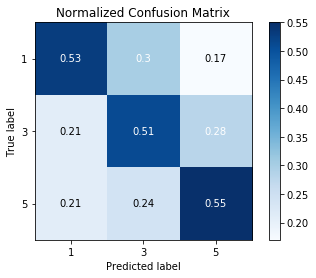

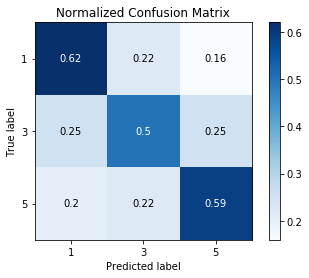

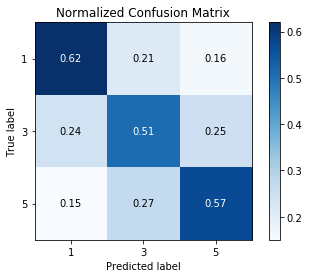

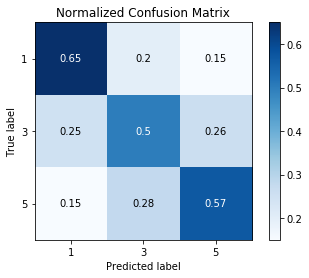

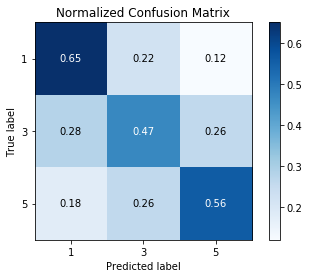

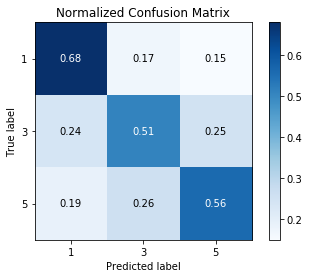

In [14]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

# WITH STOPWORDS #################################################################################################################

# initialization
dt = DecisionTreeClassifier()
dt.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = dt.predict(x_test_cleanWithStopwords)
print("WITH STOPWORDS")
print("Confusion Matrix for Decision Tree:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_dt_with_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# WITHOUT STOPWORDS #################################################################################################################

# initialization
dt = DecisionTreeClassifier()
dt.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = dt.predict(x_test_cleanNoStopwords)
print("WITHOUT STOPWORDS")
print("Confusion Matrix for Decision Tree:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_dt_no_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################

# initialization
dt = DecisionTreeClassifier()
dt.fit(x_train_porterStemmer,y_train)

# predicting
prediction = dt.predict(x_test_porterStemmer)
print("PORTERSTEMMER")
print("Confusion Matrix for Decision Tree:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_dt_porterstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################

# initialization
dt = DecisionTreeClassifier()
dt.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = dt.predict(x_test_snowballStemmer)
print("SNOWBALLSTEMMER")
print("Confusion Matrix for Decision Tree:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_dt_snowballstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################

# initialization
dt = DecisionTreeClassifier()
dt.fit(x_train_lemmatized,y_train)

# predicting
prediction = dt.predict(x_test_lemmatized)
print("LEMMATIZED")
print("Confusion Matrix for Decision Tree:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_dt_lemmatized_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LANCASTER #################################################################################################################

# initialization
dt = DecisionTreeClassifier()
dt.fit(x_train_lancaster,y_train)

# predicting
prediction = dt.predict(x_test_lancaster)
print("LANCASTER")
print("Confusion Matrix for Decision Tree:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_dt_lancaster_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# SVC

CLEANED WITH STOPWORDS
Confusion Matrix for Support Vector Machines:
[[224  21   3]
 [ 27 159  33]
 [  7  31 189]]
Score: 82.42
Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.90      0.89       248
           3       0.75      0.73      0.74       219
           5       0.84      0.83      0.84       227

   micro avg       0.82      0.82      0.82       694
   macro avg       0.82      0.82      0.82       694
weighted avg       0.82      0.82      0.82       694

WITHOUT STOPWORDS
Confusion Matrix for Support Vector Machines:
[[222  22   4]
 [ 34 151  34]
 [  8  36 183]]
Score: 80.12
Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.90      0.87       248
           3       0.72      0.69      0.71       219
           5       0.83      0.81      0.82       227

   micro avg       0.80      0.80      0.80       694
   macro avg       0.80      0.80      0.80     

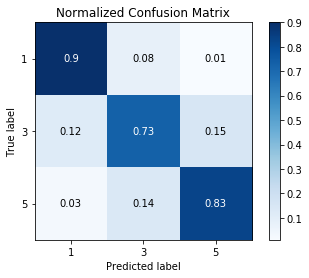

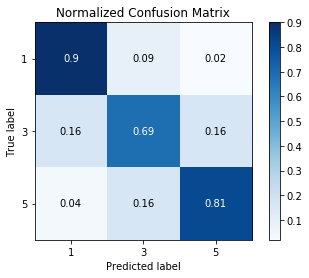

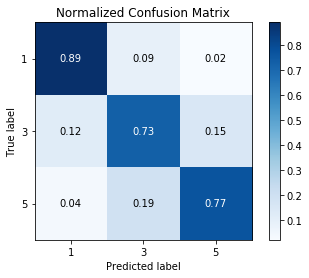

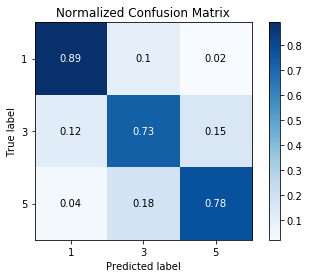

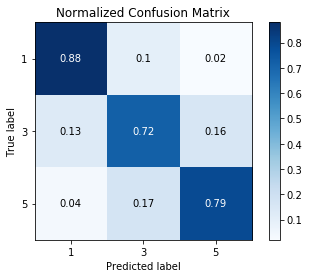

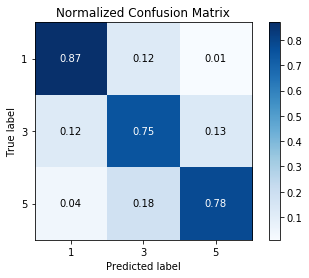

In [15]:
# SVC
from sklearn.svm import SVC

# WITH STOPWORDS #################################################################################################################

# initialization
svm = SVC(random_state=101, kernel='linear')
svm.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = svm.predict(x_test_cleanWithStopwords)
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Support Vector Machines:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_svc_with_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# WITHOUT STOPWORDS #################################################################################################################

# initialization
svm = SVC(random_state=101, kernel='linear')
svm.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = svm.predict(x_test_cleanNoStopwords)
print("WITHOUT STOPWORDS")
print("Confusion Matrix for Support Vector Machines:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_svc_no_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################

# initialization
svm = SVC(random_state=101, kernel='linear')
svm.fit(x_train_porterStemmer,y_train)

# predicting
prediction = svm.predict(x_test_porterStemmer)
print("PORTERSTEMMER")
print("Confusion Matrix for Support Vector Machines:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_svc_porterstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################

# initialization
svm = SVC(random_state=101, kernel='linear')
svm.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = svm.predict(x_test_snowballStemmer)
print("SNOWBALLSTEMMER")
print("Confusion Matrix for Support Vector Machines:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_svc_snowballstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################

# initialization
svm = SVC(random_state=101, kernel='linear')
svm.fit(x_train_lemmatized,y_train)

# predicting
prediction = svm.predict(x_test_lemmatized)
print("LEMMATIZED")
print("Confusion Matrix for Support Vector Machines:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_svc_lemmatized_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LANCASTER #################################################################################################################

# initialization
svm = SVC(random_state=101, kernel='linear')
svm.fit(x_train_lancaster,y_train)

# predicting
prediction = svm.predict(x_test_lancaster)
print("LANCASTER")
print("Confusion Matrix for Support Vector Machines:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_svc_lancaster_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# Gradient Boosting Classifier

WITH STOPWORDS
Confusion Matrix for Gradient Boosting Classifier:
[[219  18  11]
 [ 34 154  31]
 [ 18  42 167]]
Score: 77.81
Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.88      0.84       248
           3       0.72      0.70      0.71       219
           5       0.80      0.74      0.77       227

   micro avg       0.78      0.78      0.78       694
   macro avg       0.78      0.77      0.77       694
weighted avg       0.78      0.78      0.78       694

WITHOUT STOPWORDS
Confusion Matrix for Gradient Boosting Classifier:
[[213  23  12]
 [ 38 144  37]
 [ 15  46 166]]
Score: 75.36
Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.86      0.83       248
           3       0.68      0.66      0.67       219
           5       0.77      0.73      0.75       227

   micro avg       0.75      0.75      0.75       694
   macro avg       0.75      0.75      0.75   

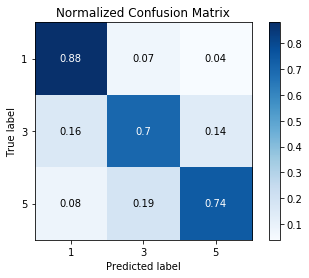

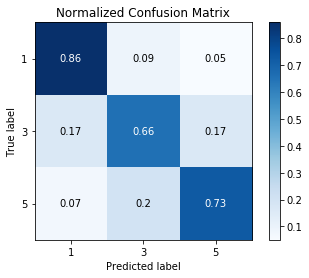

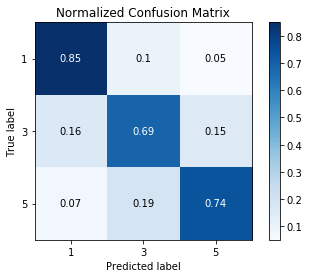

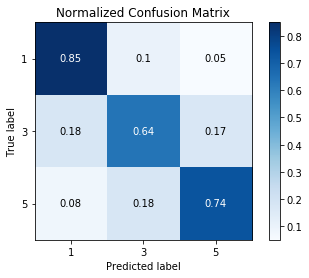

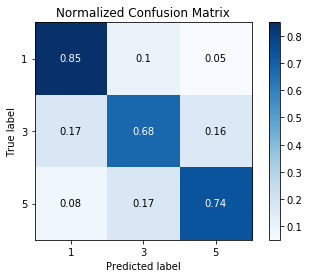

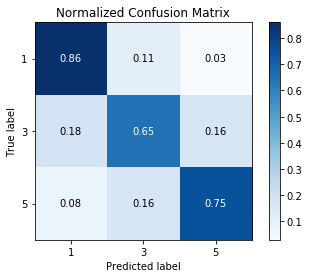

In [16]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# WITH STOPWORDS #################################################################################################################

# initialization
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=101)
gbi.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = gbi.predict(x_test_cleanWithStopwords)
print("WITH STOPWORDS")
print("Confusion Matrix for Gradient Boosting Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_gbi_with_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# WITHOUT STOPWORDS #################################################################################################################

# initialization
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=101)
gbi.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = gbi.predict(x_test_cleanNoStopwords)
print("WITHOUT STOPWORDS")
print("Confusion Matrix for Gradient Boosting Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_gbi_no_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################

# initialization
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=101)
gbi.fit(x_train_porterStemmer,y_train)

# predicting
prediction = gbi.predict(x_test_porterStemmer)
print("PORTERSTEMMER")
print("Confusion Matrix for Gradient Boosting Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_gbi_porterstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################

# initialization
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=101)
gbi.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = gbi.predict(x_test_snowballStemmer)
print("PORTERSTEMMER")
print("Confusion Matrix for Gradient Boosting Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_gbi_snowballstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################

# initialization
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=101)
gbi.fit(x_train_lemmatized,y_train)

# predicting
prediction = gbi.predict(x_test_lemmatized)
print("LEMMATIZED")
print("Confusion Matrix for Gradient Boosting Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_gbi_lemmatized_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))



# LANCASTER #################################################################################################################

# initialization
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=101)
gbi.fit(x_train_lancaster,y_train)

# predicting
prediction = gbi.predict(x_test_lancaster)
print("LANCASTER")
print("Confusion Matrix for Gradient Boosting Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_gbi_lancaster_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

CLEANED WITH STOPWORDS
Confusion Matrix for K Neighbors Classifier:
[[190  39  19]
 [ 59 112  48]
 [ 41  39 147]]
Score: 64.7
Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.77      0.71       248
           3       0.59      0.51      0.55       219
           5       0.69      0.65      0.67       227

   micro avg       0.65      0.65      0.65       694
   macro avg       0.64      0.64      0.64       694
weighted avg       0.64      0.65      0.64       694

WITHOUT STOPWORDS
Confusion Matrix for K Neighbors Classifier:
[[177  47  24]
 [ 48 127  44]
 [ 29  72 126]]
Score: 61.96
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.71      0.71       248
           3       0.52      0.58      0.55       219
           5       0.65      0.56      0.60       227

   micro avg       0.62      0.62      0.62       694
   macro avg       0.62      0.62      0.62       6

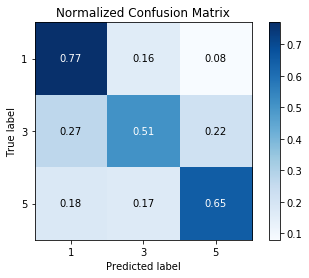

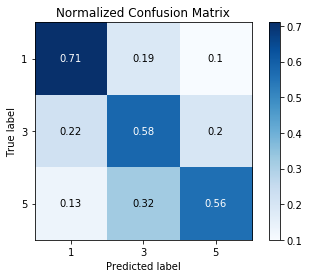

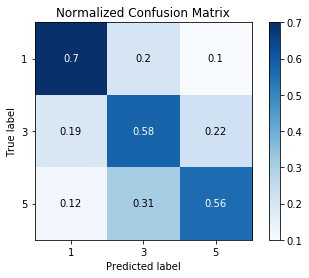

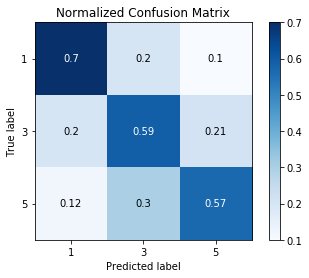

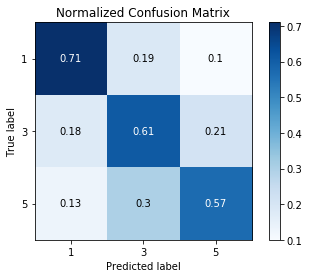

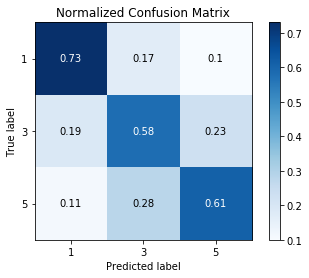

In [17]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier

# WITH STOPWORDS #################################################################################################################

# initialization
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = knn.predict(x_test_cleanWithStopwords)
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for K Neighbors Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_knn_with_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# WITHOUT STOPWORDS #################################################################################################################

# initialization
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = knn.predict(x_test_cleanNoStopwords)
print("WITHOUT STOPWORDS")
print("Confusion Matrix for K Neighbors Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_knn_no_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################

# initialization
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_porterStemmer,y_train)

# predicting
prediction = knn.predict(x_test_porterStemmer)
print("PORTERSTEMMER")
print("Confusion Matrix for K Neighbors Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_knn_porterstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################

# initialization
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = knn.predict(x_test_snowballStemmer)
print("SNOWBALLSTEMMER")
print("Confusion Matrix for K Neighbors Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_knn_snowballstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################

# initialization
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_lemmatized,y_train)

# predicting
prediction = knn.predict(x_test_lemmatized)
print("LEMMATIZED")
print("Confusion Matrix for K Neighbors Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_knn_lemmatized_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LANCASTER #################################################################################################################

# initialization
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_lancaster,y_train)

# predicting
prediction = knn.predict(x_test_lancaster)
print("LANCASTER")
print("Confusion Matrix for K Neighbors Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_knn_lancaster_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# Multilayer Perceptron Classifier

WITH STOPWORDS
Confusion Matrix for Multilayer Perceptron Classifier:
[[223  20   5]
 [ 31 157  31]
 [  7  28 192]]
Score: 82.42
Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.90      0.88       248
           3       0.77      0.72      0.74       219
           5       0.84      0.85      0.84       227

   micro avg       0.82      0.82      0.82       694
   macro avg       0.82      0.82      0.82       694
weighted avg       0.82      0.82      0.82       694

WITHOUT STOPWORDS
Confusion Matrix for Multilayer Perceptron Classifier:
[[219  25   4]
 [ 29 144  46]
 [  9  37 181]]
Score: 78.39
Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.88      0.87       248
           3       0.70      0.66      0.68       219
           5       0.78      0.80      0.79       227

   micro avg       0.78      0.78      0.78       694
   macro avg       0.78      0.78     

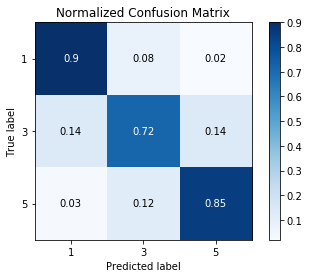

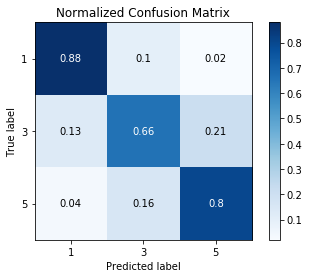

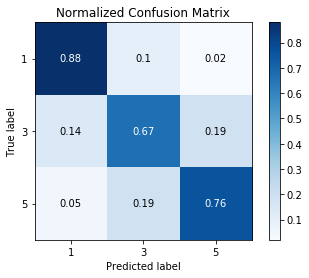

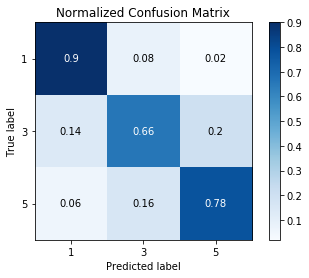

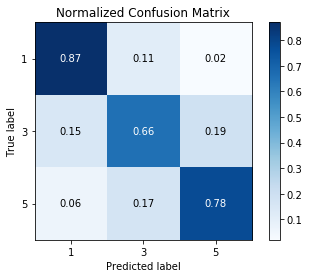

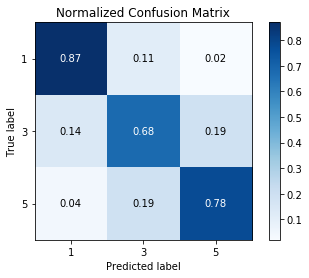

In [18]:
# Mulilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

# WITH STOPWORDS #################################################################################################################

# initialization
mlp = MLPClassifier()
mlp.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = mlp.predict(x_test_cleanWithStopwords)
print("WITH STOPWORDS")
print("Confusion Matrix for Multilayer Perceptron Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_mlp_with_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# WITHOUT STOPWORDS #################################################################################################################

# initialization
mlp = MLPClassifier()
mlp.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = mlp.predict(x_test_cleanNoStopwords)
print("WITHOUT STOPWORDS")
print("Confusion Matrix for Multilayer Perceptron Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_mlp_no_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################

# initialization
mlp = MLPClassifier()
mlp.fit(x_train_porterStemmer,y_train)

# predicting
prediction = mlp.predict(x_test_porterStemmer)
print("PORTERSTEMMER")
print("Confusion Matrix for Multilayer Perceptron Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_mlp_porterstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################

# initialization
mlp = MLPClassifier()
mlp.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = mlp.predict(x_test_snowballStemmer)
print("SNOWBALLSTEMMER")
print("Confusion Matrix for Multilayer Perceptron Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_mlp_snowballstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################

# initialization
mlp = MLPClassifier()
mlp.fit(x_train_lemmatized,y_train)

# predicting
prediction = mlp.predict(x_test_lemmatized)
print("LEMMATIZED")
print("Confusion Matrix for Multilayer Perceptron Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_mlp_lemmatized_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LANCASTER #################################################################################################################

# initialization
mlp = MLPClassifier()
mlp.fit(x_train_lancaster,y_train)

# predicting
prediction = mlp.predict(x_test_lancaster)
print("LANCASTER")
print("Confusion Matrix for Multilayer Perceptron Classifier:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_mlp_lancaster_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# Logistic Regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


WITH STOPWORDS
CLEANED WITH STOPWORDS
Confusion Matrix for Logistic Regression:
[[220  23   5]
 [ 28 158  33]
 [  7  30 190]]
Score: 81.84
Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.89      0.87       248
           3       0.75      0.72      0.73       219
           5       0.83      0.84      0.84       227

   micro avg       0.82      0.82      0.82       694
   macro avg       0.81      0.82      0.81       694
weighted avg       0.82      0.82      0.82       694

WITHOUT STOPWORDS
CLEANED WITH STOPWORDS
Confusion Matrix for Logistic Regression:
[[218  25   5]
 [ 32 150  37]
 [ 10  36 181]]
Score: 79.11
Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.88      0.86       248
           3       0.71      0.68      0.70       219
           5       0.81      0.80      0.80       227

   micro avg       0.79      0.79      0.79       694
   macro avg      

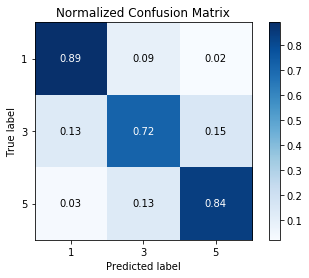

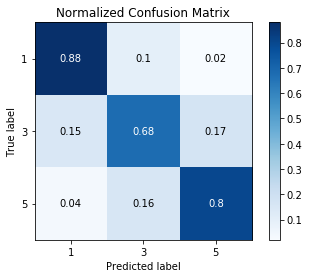

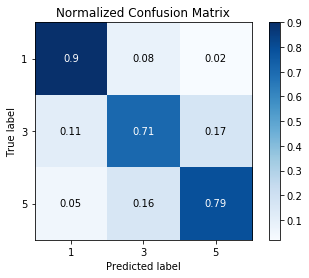

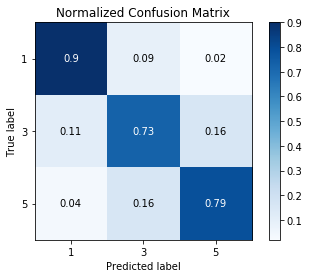

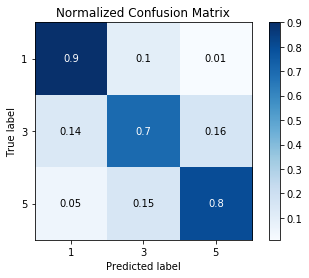

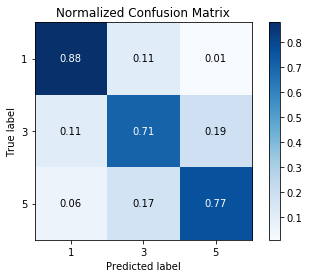

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# WITH STOPWORDS #################################################################################################################

# initialization
lrg = LogisticRegression(C=1e5, solver='saga', multi_class='multinomial', random_state = 101)
lrg.fit(x_train_cleanWithStopwords,y_train)

# predicting
prediction = lrg.predict(x_test_cleanWithStopwords)
print("WITH STOPWORDS")
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Logistic Regression:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_lrg_with_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# WITHOUT STOPWORDS #################################################################################################################

# initialization
lrg = LogisticRegression(C=1e5, solver='saga', multi_class='multinomial', random_state = 101)
lrg.fit(x_train_cleanNoStopwords,y_train)

# predicting
prediction = lrg.predict(x_test_cleanNoStopwords)
print("WITHOUT STOPWORDS")
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Logistic Regression:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_lrg_no_stopwords_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################

# initialization
lrg = LogisticRegression(C=1e5, solver='saga', multi_class='multinomial', random_state = 101)
lrg.fit(x_train_porterStemmer,y_train)

# predicting
prediction = lrg.predict(x_test_porterStemmer)
print("PORTERSTEMMER")
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Logistic Regression:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_lrg_porterstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################

# initialization
lrg = LogisticRegression(C=1e5, solver='saga', multi_class='multinomial', random_state = 101)
lrg.fit(x_train_snowballStemmer,y_train)

# predicting
prediction = lrg.predict(x_test_snowballStemmer)
print("SNOWBALLSTEMMER")
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Logistic Regression:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_lrg_snowballstemmer_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################

# initialization
lrg = LogisticRegression(C=1e5, solver='saga', multi_class='multinomial', random_state = 101)
lrg.fit(x_train_lemmatized,y_train)

# predicting
prediction = lrg.predict(x_test_lemmatized)
print("LEMMATIZED")
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Logistic Regression:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_lrg_lemmatized_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))

# LANCASTER #################################################################################################################

# initialization
lrg = LogisticRegression(C=1e5, solver='saga', multi_class='multinomial', random_state = 101)
lrg.fit(x_train_lancaster,y_train)

# predicting
prediction = lrg.predict(x_test_lancaster)
print("LANCASTER")
print("CLEANED WITH STOPWORDS")
print("Confusion Matrix for Logistic Regression:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("tf_unibi_lrg_lancaster_3.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))